**Robert Lacher**
**MATH 3332**
**Section 62**

# Problem Statement
An urn contains 3 red balls. The experiment consists of taking a random ball from the urn and replacing it with a blue ball. We repeat this till all the balls in the urn are blue.

## Part B
Same as in (a) but this time use Markov chain. First determine the states. Then create Markov diagram and transition matrix. Finally use the transition matrix to create the table.

### States
The possible states are:

1. (3, 0)

2. (2, 1)

3. (1, 2)

4. (0, 3)


### Markov Diagram

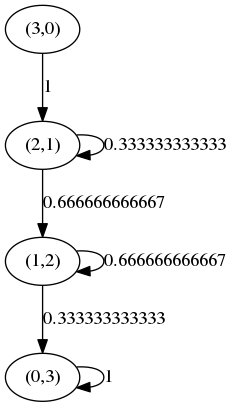

In [19]:
from __future__ import division
from graphviz import Digraph
from IPython.display import Image
import numpy as np

# Create Digraph object
dot = Digraph(comment='Markov Chain Diagram', format='png')

# Create lists of nodes and edges
nodes = ['(3,0)', '(2,1)', '(1,2)', '(0,3)']
edges = [
    [0,0,0,0],
    [1,1/3,0,0],
    [0,2/3,2/3,0],
    [0,0,1/3,1],
]

# Add nodes to digraph
for i, node in enumerate(nodes):
    dot.node(node, label=node)
    
# Add edges between nodes to digraph
for outer in xrange(len(edges)):
    for inner, value in enumerate(edges[outer]):
        if value != 0:
            dot.edge(nodes[inner], nodes[outer], label=str(value))

# Generate graph
filename = dot.render()
Image(filename=filename)

### Transition Matrix

In [95]:
# Create array object from edges
transition_matrix = np.array(edges)

# Create labels for rows, columns
labels = ['(3, 0)', '(2, 1)', '(1, 2)', '(0, 3)']

# Print column labels
print ' State ' + ' '.join(i for i in labels)

# Print row labels, row values
for row_label, row in zip(labels, transition_matrix):
    values = ' '.join('%.4f' % i for i in row)
    print '{:<3}{}'.format(row_label + ' ', values)

 State (3, 0) (2, 1) (1, 2) (0, 3)
(3, 0) 0.0000 0.0000 0.0000 0.0000
(2, 1) 1.0000 0.3333 0.0000 0.0000
(1, 2) 0.0000 0.6667 0.6667 0.0000
(0, 3) 0.0000 0.0000 0.3333 1.0000


### Probability Table

In [73]:
# Store the probability that the round ends, this round
probability_sum = 0
# Store the round number
round_number = 1

# Print column headers
print '{:<10}{}'.format('Round', 'Probability')
while probability_sum < 0.99:
    
    # Transpose the matrix and retrieve probability that the round ends
    # Store that probability in probability_sum
    probability_sum = np.matrix.transpose(
        np.linalg.matrix_power(transition_matrix, round_number)
    )[0][3]
    
    # Print the round number and probability
    print '{:<10}{:<15.4f}'.format(round_number, probability_sum)
    
    # Increment round number
    round_number += 1
    

Round     Probability
1         0.0000         
2         0.0000         
3         0.2222         
4         0.4444         
5         0.6173         
6         0.7407         
7         0.8258         
8         0.8834         
9         0.9221         
10        0.9480         
11        0.9653         
12        0.9769         
13        0.9846         
14        0.9897         
15        0.9931         
